In [1]:
import os
BASE_DIR = os.path.dirname(os.path.dirname(os.path.abspath('__file__')))
print(BASE_DIR)

import math
import numpy as np
import pandas as pd

import bokeh.plotting as bp
from bokeh.models import tools as bmt

from bokeh.io import output_notebook, export_png
output_notebook()

from IPython.display import Image

/Users/biplovbhandari/UAH/Fall_2021/ESS_690_Hydrology/Test


Loading BokehJS ...

In [2]:
def initialize_fig(title: str = 'your_title',
                   x_axis_label: str = 'x_axis_label',
                   x_axis_type: str = 'auto',
                   y_axis_label: str = 'y_axis_label',
                   y_axis_type: str = 'auto',
                   tools: str = 'pan,wheel_zoom,box_zoom,reset',
                   tooltips: list = [],
                   formatters: dict = {},
                   plot_height: int = 300,
                   fig_sizing_mode: str = 'scale_width',
                   ) -> bp.figure:
    # bokeh style
    TOOLS = tools
    hover_tool = bmt.HoverTool(tooltips=tooltips, formatters=formatters)

    fig = bp.figure(title=title,
                    x_axis_label=x_axis_label,
                    x_axis_type=x_axis_type,
                    y_axis_label=y_axis_label,
                    y_axis_type=y_axis_type,
                    plot_height=plot_height,
                    tools=TOOLS,
                   )
    fig.add_tools(hover_tool)
    fig.sizing_mode = fig_sizing_mode

    return fig

### Q1
The following weather data are available near a lake.
<br/>
Net radiation 90 W/m2 
<br/>
Wind speed 2.5 m/s at a height of 2.0 m 
<br/>
Air pressure 85 kPa 
<br/>
Air Temperature 22 C 
<br/>
Specific humidity 0.009 kg/kg 
<br/>
Surface roughness length zo = 3 x 10-4 m. 
<br/>

a) Indicate which| of the following methods you have sufficient information to use to calculate lake evaporation (or equilibrium PET) 
<br/>
A. Priestley Taylor 
<br/>
B. Mass Transfer/Aerodynamic 
<br/>
C. Combination/Penman 
<br/>
D. Energy balance/Bowen Ratio 


b) Calculate the evaporation in mm/day using all the methods for which there is sufficient information. 


#### Since mass transfer and energy balance need temperature at reference height and surface, the evaporation that can be computed given the information are the Priestley Taylor and the Penman

In [3]:
# Given
K_L = 90 # net shortwave radiation (K) + net longwave radiation (L) in W / m2
K_L = K_L * 8.64e-2 # net shortwave radiation (K) + net longwave radiation (L) in MJ/m2.d
zm = 2.0 # elevation in m
P = 85 # pressure in kPa
z0 = 3e-4 # roughness height in m
q = 0.009 # specific humidity in kg / kg 
T = 22 # air temperature in degree Celsius
u = 2.5 # # wind-speed at 2m in m/s

In [4]:
# We know
ρw = 996 # # density of water in kg/m3
cp = 1.0e-3 # Air specific heat in MJ/kg.C
zm = 2 # m
# zd is the zero-plane displacement height
zd = 0

#### Priestley and Taylor Method

In [5]:
αpt = 1.26

In [6]:
Δ_T = (2508.3 * math.exp((17.3 * T) / (T + 237.3))) / (math.pow((T + 237.3), 2)) # kPa/°C
Δ_T

0.1618940846873898

In [7]:
λv = 2.5 - 2.36e-3 * T # latent heat of vaporization in MJ/kg
λv

2.44808

In [8]:
γ = (cp * P) / (0.622 * λv) # psychrometric constant in kPa/°C
γ

0.055821684157811295

In [9]:
PET = (αpt * Δ_T * K_L) / (ρw * λv * (Δ_T + γ))
PET # m/day

0.002988016201373662

In [10]:
PET = PET * 1000 # mm/day
PET

2.988016201373662

#### Combination/Penman

In [11]:
e_astrik = 0.611 * math.exp((17.3 * T) / (T + 237.3))
e_astrik # kPa

2.6515373335539105

In [12]:
e = (q * P) / (0.622)
e

1.2299035369774918

In [13]:
RH = e / e_astrik
RH

0.46384545350867323

In [14]:
# KE from 6.11
KE = 1.2e-6 / (math.log((zm - zd) / z0))**2 # kPa-1
KE

1.547871237980864e-08

In [15]:
# multiplying KE by 1e-3 m/mm to give consistent units (s/kPa.day)
numerator = Δ_T * (K_L) + (γ * (KE * 1e-3) * ρw * λv * u * e_astrik * (1. - RH))
numerator

1.258888410016878

In [16]:
denominator = ρw * λv * (Δ_T + γ)
denominator

530.8536769169816

In [17]:
E0 = numerator / denominator # m/day
E0

0.0023714414437667184

In [18]:
E0 = E0 * 1000. # mm/day
E0

2.3714414437667184

### Q2. Briefly define each of the following terms and describe their differences: PET, ETo, and AET

#### The PET or Potential Evapotranspiration is the amount of evapotranspiration from growing vegetation in a large area in a given time such that the crop is completely shading the ground, and has adequate moisture at all times in the soil and without advection or heat-storage effects. This is the potential demand from the atmosphere and depend upon the energy coming in and the vapor pressure deficit. However this is limited by the amount of water that is available in the ground.
#### The ETo or the Reference Crop Evapotranspiration or RET is the amount of evapotranspiration from a short green crop (usually grass) or some reference crop that is completely shading the ground, is of uniform height and never short of water. This is the PET for a reference crop in question.
#### Actual Evapotranspiration (AET) refers to the actual evapotranspiration coming from the surface and is dependendent on the soil characteristics, amount of water available, latent energy, storage in the soil, etc. This is the function of supply.
#### Usually the PET >= AET.



### Q3. What is the difference in an Energy Limited environment vs a Water Limited environment?

#### In tropical and subtropical region or hot area in general, the amount of incoming solar radiation is much larger than the precipitation received. As a result, the potential evapotransiration is greater or equal to the average precipitation. This region or environment is the water-limited environment. In contrast, regions (for example Cherrapunji) that receives abundant amount of rainfall does not comparatively receive much solar radiation. As a result, evapotranspiration is limited by the available energy. Ths is the energy-limited region. If potential evapotranspiration is represented as PET and average precipitation as P, then for energy-limited environment, PET / P < 1 and for water-limited environment PET / P > 1.

### Q5

Develop a Hydrograph using the NRCS/SCS method for a rainfall event of duration 1.6 hours on a watershed with following properties: 
-Hydraulic Length: 18 miles
-Average slope: 100ft/mi
-The watershed consists of a permanent meadow in good condition with soil group D (Use table 10.11 in your book)

Sketch the resulting hydrograph and label all components


In [19]:
d = 1.6 # hours
l = 18 # miles
l = l * 5280. # ft
A = 100 # sq-miles
m = 100 # ft/mi
m = 100 / 5280. # ft / ft
m = m * 100 # in %
m

1.893939393939394

In [20]:
# for permanent meadow in good condition for soil type D
cn = 78

In [21]:
# storage
S = 1000. / cn - 10.
S # inches

2.820512820512821

In [22]:
# assume excess rainfall of 1 inch
P = 1.
Q = ((P - 0.2 * S)**2) / (P + 0.8 * S)
Q # inches

0.058348475671310275

In [23]:
# lag time
tL = (l**.8 * (S + 1.)**.7) / (1900. * m**.5) # hr
tL

9.38369028998775

In [24]:
# time to rise
TR = Tp = d / 2. + tL
TR # hr

10.183690289987751

In [25]:
# base duration
B = 1.67 * TR
B # min

17.006762784279545

In [26]:
# total duration
T = TR + B
T # min

27.190453074267296

In [27]:
Qp = 484. * A / TR # cfs
Qp

4752.697560685363

<!-- NRCS Triangle Hydrograph

![NRCS_Triangle_Hydrograph_Method](https://i.imgur.com/80N34SJ.jpeg) -->

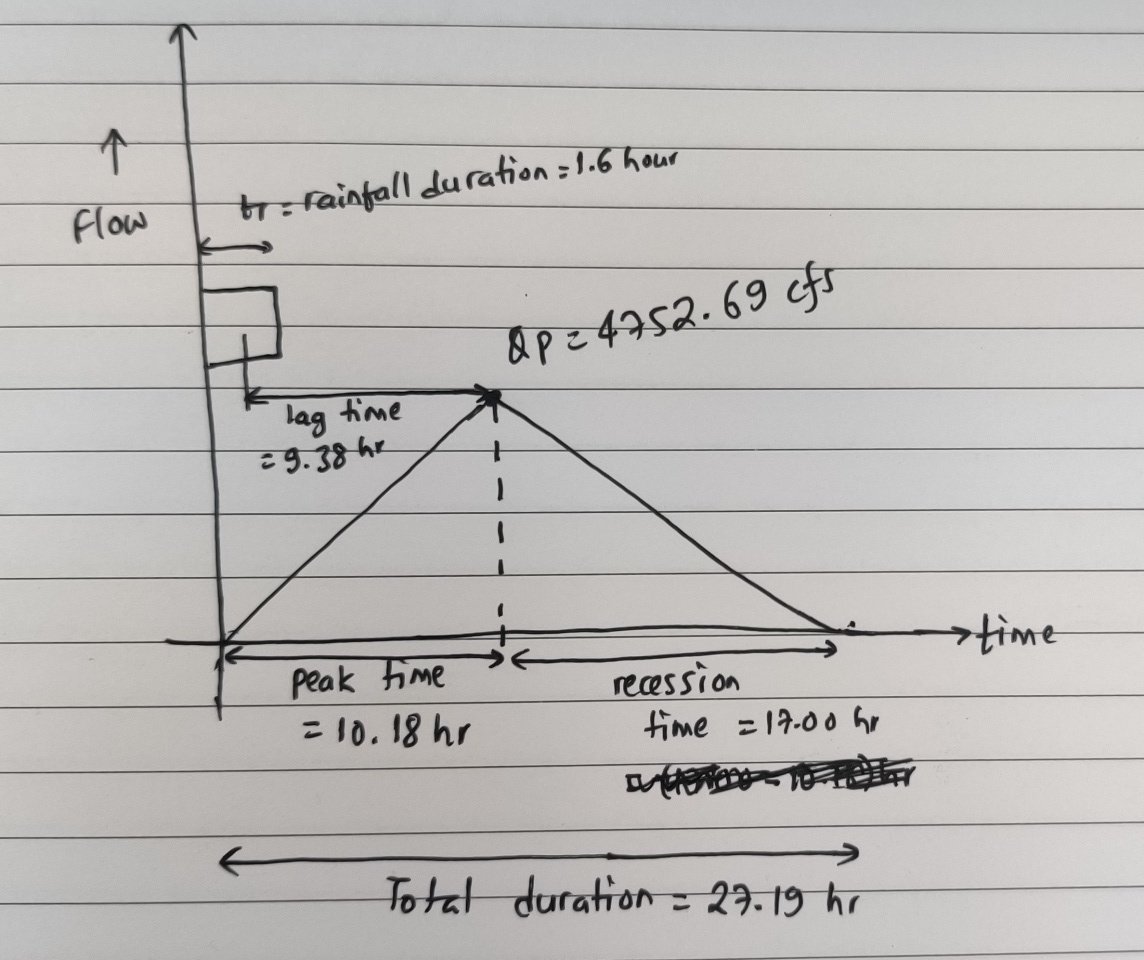

In [28]:
Image(f'{BASE_DIR}/Test#2/problem_5.jpg')

### Q6. Why is the rising side of a storage vs discharge curve typically lower than the falling side? How does the Muskingum k and x parameters relate to this relationship?

#### For the storage-discharge relationship, in the rising limb, the inflow (I) is greater than the outflow (Q), and as we move downstream the change in storage decreases as the antecedent condition plays a role. Thus the curve is steeper as it reaches the peak. For the falling limb, even after the inflow stops, the storage component is still in play as we have to drain larger area. Thus the outflow tends to stay longer.

#### Storage can be thought as a function of time (k) and the outflow (Q), i.e. S=kQ. For the rising limb, i.e. when the inflow occurs (where I > Q), in addition to the base storage (S=kQ), we need to take into account the some other components which is the weight component (x). Thus the storage then for the rising limb would be S=kQ + kxQ. Similar is the case for the falling limb where I < Q but in opposite direction. Thus the muskingum make use of these components as S = kQ + kx(I-Q)


### Q7. Briefly discuss the differences between Muskingum and Muskingum -Cunge and why Muskingum-Cunge is preferred to kinematic wave river routing?

#### We are looking at the continuity equation and the change in storage in the Muskingum. However, in Muskingum-Cunge, in addition to the continuity, we are also looking at the momentum. This includes the friction slope, change in depth of the water with respect to distance and the change in the velocity of the water with respect to time. Muskingum is hydrologic routing, while Muskingum-cunge is hydraulic routing.
#### Muskingum-cunge produce the the routing parameters K and X based on the channel morphology, as represented by the prevailing channel slope and cross-sectional-shape characteristics as oppose to the steady-state flow. The kinematic wave celerity and the Manning's equation are used by Muskingum-cunge based on the kinematic factor. Thus Muskingum-cunge is a preferred approach to the kinematic wave river routing.

### Q8

The hydrograph at the upstream end of a river is given in the following table. The reach of interest is 10 km long. Determine the hydrograph at 4km downstream and 10 km downstream. The slope of the stream is 0.001, B = 50m and the cross-sectional area of the streamflow at Qp = 187.5 m2. Assume no lateral flow. Assume a ∆t = 1.5 hr for a ∆x 6km or below.

| T (hr) | Q (m3/s) |
| ------ | -------- |
|    0   |      12  |
|    1   |    14.4  |
|    2   |    21.6  |
|    3   |    34.2  |
|    4   |      60  |
|    5   |    93.6  |
|    6   |   128.4  |
|    7   |   161.4  |
|    8   |   176.4  |
|    9   |     180  |
|   10   |   175.2  |
|   11   |   154.8  |
|   12   |     126  |
|   13   |    93.6  |
|   14   |    70.8  |
|   15   |      54  |
|   16   |    39.6  |
|   17   |    28.8  |
|   18   |    20.4  |
|   19   |    14.4  |
|   20   |      12  |


In [29]:
# in hours
Ts = np.arange(0, 21, 1)

# in cms
Qs = [12., 14.4, 21.6, 34.2, 60., 93.6, 128.4, 161.4, 176.4, 180, 175.2, 154.8, 126., 93.6, 70.8, 54., 39.6, 28.8, 20.4, 14.4, 12.]


In [30]:
So = 0.001

# cross-sectional area
Q_ref = max(Qs) # peak cms
A_ref = 187.5 # m2
B = 50 # m
Δt = 1.5 # hour


ΔX1 = 4 # km
ΔX1 = ΔX1 * 1e3 # m
ΔX1

4000.0

In [31]:
V = Q_ref / A_ref # m/sec
V # m/sec

0.96

In [32]:
# kinematic wave celerity
c = 5 / 3 * V # m/sec
c

1.6

In [33]:
K1 = ΔX1 / c # sec
K1 = K1 / (60 * 60) # hour
K1

0.6944444444444444

In [34]:
D1 = Q_ref / (2 * B * So)
D1 # m2/s

1800.0

In [35]:
X = (1 / 2) - (D1 / (c * ΔX1 ))
X

0.21875

In [36]:
denom = K1 * (1 - X) + 0.5 * Δt
denom # hr

1.2925347222222223

In [37]:
C0_num = K1 * X + 0.5 * Δt
C0 = C0_num / denom
C0

0.6977837474815312

In [38]:
C1_num = 0.5 * Δt - K1 * X
C1 = C1_num / denom
C1

0.46272666218938885

In [39]:
C2_num = K1 * (1 - X) - 0.5 * Δt
C2 = C2_num / denom
C2

-0.1605104096709201

In [40]:
# sanity check
C0 + C1 + C2

0.9999999999999999

In [41]:
df = pd.DataFrame({'hour': Ts, 'Q_inflow': Qs})
df

,hour,Q_inflow
0,0,12.0
1,1,14.4
2,2,21.6
3,3,34.2
4,4,60.0
5,5,93.6
6,6,128.4
7,7,161.4
8,8,176.4
9,9,180.0


In [42]:
C0__Qj_n = list(df.Q_inflow * C0)
C0__Qj_n = [np.nan] + list(C0__Qj_n)
C0__Qj_n = C0__Qj_n[:-1]

In [43]:
df['C0__Qj_n'] = C0__Qj_n
df

,hour,Q_inflow,C0__Qj_n
0,0,12.0,NaN
1,1,14.4,8.373405
2,2,21.6,10.048086
3,3,34.2,15.072129
4,4,60.0,23.864204
5,5,93.6,41.867025
6,6,128.4,65.312559
7,7,161.4,89.595433
8,8,176.4,112.622297
9,9,180.0,123.089053


In [44]:
C1_Qj__n_1 = df.Q_inflow * C1
C1_Qj__n_1[0] = np.nan

In [45]:
df['C1_Qj__n_1'] = C1_Qj__n_1
df

,hour,Q_inflow,C0__Qj_n,C1_Qj__n_1
0,0,12.0,NaN,NaN
1,1,14.4,8.373405,6.663264
2,2,21.6,10.048086,9.994896
3,3,34.2,15.072129,15.825252
4,4,60.0,23.864204,27.763600
5,5,93.6,41.867025,43.311216
6,6,128.4,65.312559,59.414103
7,7,161.4,89.595433,74.684083
8,8,176.4,112.622297,81.624983
9,9,180.0,123.089053,83.290799


In [46]:
Q_outflow_4km = []
for i in range(len(df.Q_inflow)):
    if i == 0:
        Q_total = list(df.Q_inflow.values)[0]
    else:
        Q_before = Q_outflow_4km[-1]
        Q_part = C2 * Q_before
        Q_total = Q_part + C0__Qj_n[i] + C1_Qj__n_1[i]
    Q_outflow_4km.append(Q_total)


In [47]:
df['Q_outflow_4km'] = Q_outflow_4km
df = df.drop(['C0__Qj_n', 'C1_Qj__n_1'], axis=1)
df

,hour,Q_inflow,Q_outflow_4km
0,0,12.0,12.000000
1,1,14.4,13.110544
2,2,21.6,17.938603
3,3,34.2,28.018048
4,4,60.0,47.130615
5,5,93.6,77.613286
6,6,128.4,112.268922
7,7,161.4,146.259186
8,8,176.4,170.771158
9,9,180.0,178.969304


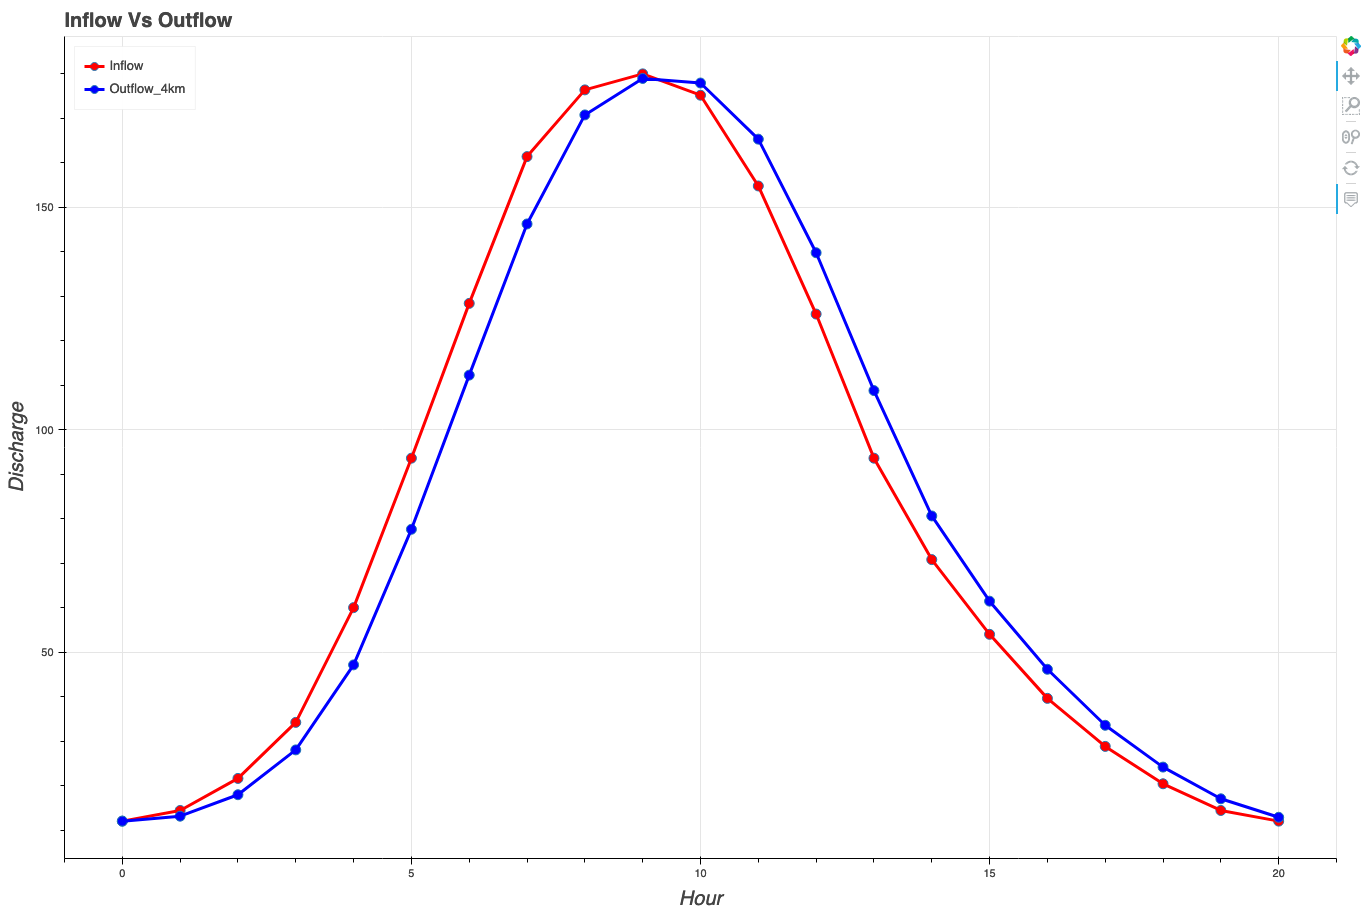

In [48]:
fig = initialize_fig(title = 'Inflow Vs Outflow',
                     x_axis_label = 'Hour',
                     y_axis_label = 'Discharge',
                     tooltips = [
                         ('hour',       '$x'),
                         ('discharge' , '$y'),
                     ],
                     plot_height = 300,
                    )

fig.title.text_font_size = '15pt'
fig.xaxis.axis_label_text_font_size = '15pt'
fig.yaxis.axis_label_text_font_size = '15pt'

fig.circle(df.hour, df.Q_inflow, fill_color='red', size=10, legend_label='Inflow')
fig.line(df.hour, df.Q_inflow, line_width=3, line_color='red', legend_label='Inflow')

fig.circle(df.hour, df.Q_outflow_4km, fill_color='blue', size=10, legend_label='Outflow_4km')
fig.line(df.hour, df.Q_outflow_4km, line_width=3, line_color='blue', legend_label='Outflow_4km')

fig.legend.location = 'top_left'
fig.legend.click_policy='hide'
bp.show(fig)

export_png(fig, filename=f'{BASE_DIR}/Test#2/problem_8_part_1.png', height=200, width=300)
Image(f'{BASE_DIR}/Test#2/problem_8_part_1.png')

In [49]:
# For further routing 6km from 4km point (total 10km), we use the discharge at 4km point 
# as the inflow to the 6km down
# in cms
Qs = df.Q_outflow_4km.tolist()


In [50]:
# cross-sectional area
Q_ref = max(Qs) # peak cms
# and we can still use Δt as 1.5 hour
Δt = 1.5 # hour

ΔX2 = 6 # km
ΔX2 = ΔX2 * 1e3 # m
ΔX2

6000.0

In [51]:
c

1.6

In [52]:
K2 = ΔX2 / c # sec
K2 = K2 / (60 * 60) # hour
K2

1.0416666666666667

In [53]:
D2 = Q_ref / (2 * B * So)
D2 # m2/s

1789.693036838701

In [54]:
X = (1 / 2) - (D2 / (c * ΔX2 ))
X

0.31357364199596865

In [55]:
denom = K2 * (1 - X) + 0.5 * Δt
denom # hr

1.4650274562541994

In [56]:
C0_num = K2 * X + 0.5 * Δt
C0 = C0_num / denom
C0

0.7348935378762333

In [57]:
C1_num = 0.5 * Δt - K2 * X
C1 = C1_num / denom
C1

0.2889780582474453

In [58]:
C2_num = K2 * (1 - X) - 0.5 * Δt
C2 = C2_num / denom
C2

-0.023871596123678774

In [59]:
C0 + C1 + C2

0.9999999999999999

In [60]:
C0__Qj_n = list(df.Q_outflow_4km * C0)
C0__Qj_n = [np.nan] + list(C0__Qj_n)
C0__Qj_n = C0__Qj_n[:-1]

In [61]:
df['C0__Qj_n'] = C0__Qj_n
df

,hour,Q_inflow,Q_outflow_4km,C0__Qj_n
0,0,12.0,12.000000,NaN
1,1,14.4,13.110544,8.818722
2,2,21.6,17.938603,9.634854
3,3,34.2,28.018048,13.182963
4,4,60.0,47.130615,20.590283
5,5,93.6,77.613286,34.635985
6,6,128.4,112.268922,57.037502
7,7,161.4,146.259186,82.505705
8,8,176.4,170.771158,107.484931
9,9,180.0,178.969304,125.498621


In [62]:
C1_Qj__n_1 = df.Q_outflow_4km * C1
C1_Qj__n_1[0] = np.nan

In [63]:
df['C1_Qj__n_1'] = C1_Qj__n_1
df

,hour,Q_inflow,Q_outflow_4km,C0__Qj_n,C1_Qj__n_1
0,0,12.0,12.000000,NaN,NaN
1,1,14.4,13.110544,8.818722,3.788660
2,2,21.6,17.938603,9.634854,5.183863
3,3,34.2,28.018048,13.182963,8.096601
4,4,60.0,47.130615,20.590283,13.619714
5,5,93.6,77.613286,34.635985,22.428537
6,6,128.4,112.268922,57.037502,32.443255
7,7,161.4,146.259186,82.505705,42.265696
8,8,176.4,170.771158,107.484931,49.349118
9,9,180.0,178.969304,125.498621,51.718202


In [64]:
Q_outflow_10km = []
for i in range(len(df.Q_outflow_4km)):
    if i == 0:
        Q_total = list(df.Q_outflow_4km.values)[0]
    else:
        Q_before = Q_outflow_10km[-1]
        Q_part = C2 * Q_before
        Q_total = Q_part + C0__Qj_n[i] + C1_Qj__n_1[i]
    Q_outflow_10km.append(Q_total)


In [65]:
df['Q_outflow_10km'] = Q_outflow_10km
df = df.drop(['C0__Qj_n', 'C1_Qj__n_1'], axis=1)
df

,hour,Q_inflow,Q_outflow_4km,Q_outflow_10km
0,0,12.0,12.000000,12.000000
1,1,14.4,13.110544,12.320923
2,2,21.6,17.938603,14.524597
3,3,34.2,28.018048,20.932839
4,4,60.0,47.130615,33.710296
5,5,93.6,77.613286,56.259803
6,6,128.4,112.268922,88.137746
7,7,161.4,146.259186,122.667412
8,8,176.4,170.771158,153.905781
9,9,180.0,178.969304,173.542846


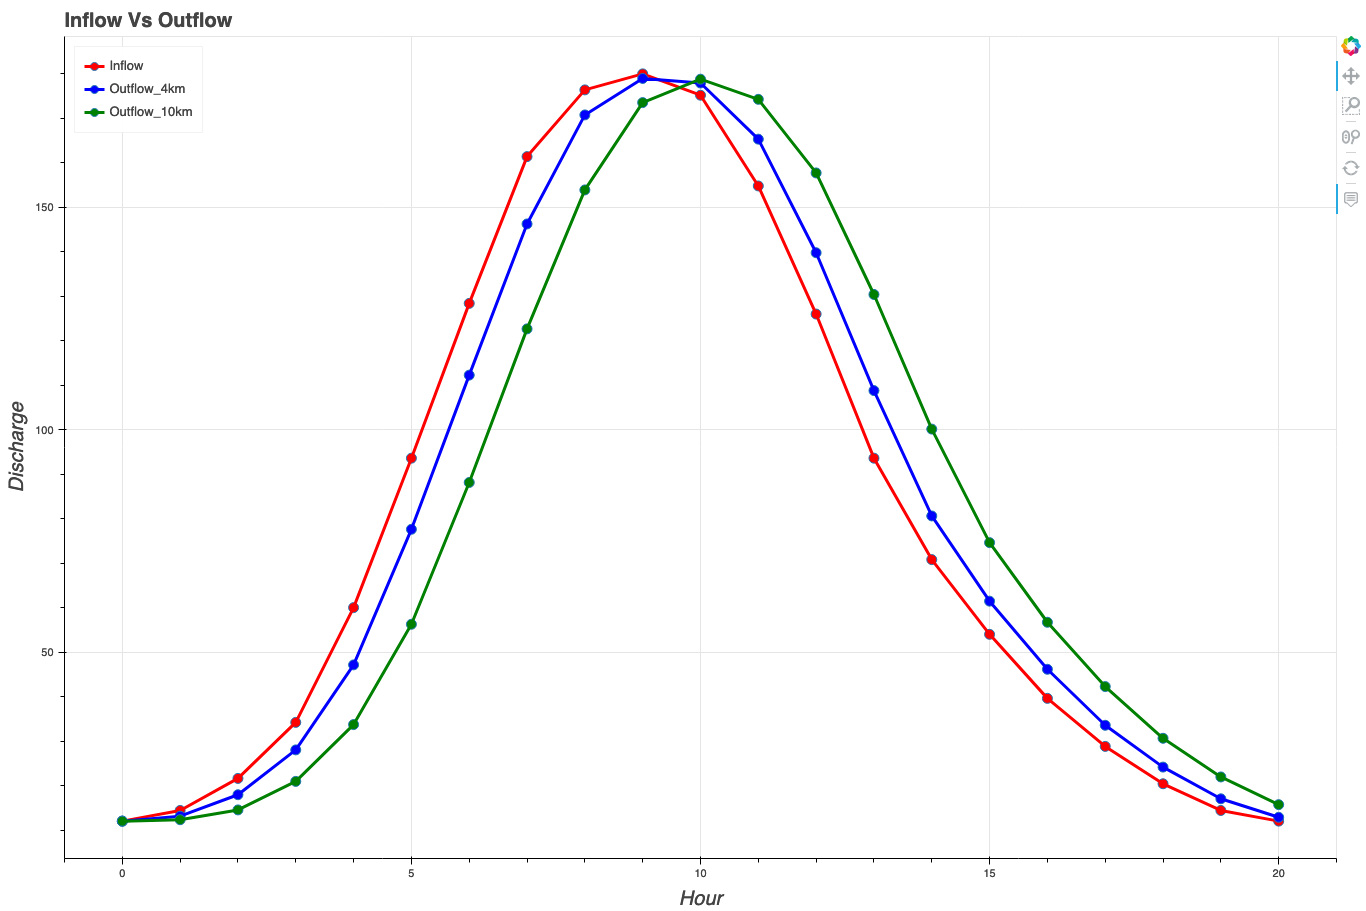

In [66]:
fig = initialize_fig(title = 'Inflow Vs Outflow',
                     x_axis_label = 'Hour',
                     y_axis_label = 'Discharge',
                     tooltips = [
                         ('hour',       '$x'),
                         ('discharge' , '$y'),
                     ],
                     plot_height = 300,
                    )

fig.title.text_font_size = '15pt'
fig.xaxis.axis_label_text_font_size = '15pt'
fig.yaxis.axis_label_text_font_size = '15pt'

fig.circle(df.hour, df.Q_inflow, fill_color='red', size=10, legend_label='Inflow')
fig.line(df.hour, df.Q_inflow, line_width=3, line_color='red', legend_label='Inflow')

fig.circle(df.hour, df.Q_outflow_4km, fill_color='blue', size=10, legend_label='Outflow_4km')
fig.line(df.hour, df.Q_outflow_4km, line_width=3, line_color='blue', legend_label='Outflow_4km')

fig.circle(df.hour, df.Q_outflow_10km, fill_color='green', size=10, legend_label='Outflow_10km')
fig.line(df.hour, df.Q_outflow_10km, line_width=3, line_color='green', legend_label='Outflow_10km')

fig.legend.location = 'top_left'
fig.legend.click_policy='hide'
bp.show(fig)

export_png(fig, filename=f'{BASE_DIR}/Test#2/problem_8.png', height=200, width=300)
Image(f'{BASE_DIR}/Test#2/problem_8.png')

### Q4
Consider a storm having excess rainfall of 2 cm for the first 2 hours and 3 cm for the second 2 hours. The 2 hour unit hydrograph of a watershed is given below. This watershed drains into a detention basin that has an area of 10 km2

| T (hr) | Q (m3/s/cm) |
| ------ | --------    |
|    0   |       0     |
|    2   |     1.8     |
|    4   |    30.9     |
|    6   |    85.6     |
|    8   |    41.8     |
|   10   |    14.6     |
|   12   |     5.5     |
|   14   |     1.8     |
|   16   |       0     |

In [67]:
# Given
Qs = [0, 1.8, 30.9, 85.6, 41.8, 14.6, 5.5, 1.8, 0]
# Total volume for 5 cm excess rainfall will be
Q = sum(Qs) # m3/s
Q = round(Q, 4)
Q

182.0

In [68]:
# volume is given as
# A * Δl = Q * Δt
# m2 * m = m3/s * s
# A = Q * Δt / Δl
Δt = 2 # hours
Δt = Δt * 60 * 60 # sec
Δl = 1 # cm
Δl = Δl * 0.01 # m
A = Q * Δt / Δl # m2
A = A / 1e+6 # km2
A

131.04

In [69]:
Pn = np.array([ 2., 3. ]) # cm
# filling up with np.nan that would be used later
UH = [0, 1.8, 30.9, 85.6, 41.8, 14.6, 5.5, 1.8, 0] # cms/cm
UH_nan = [np.nan for _ in range(len(Pn)-1)]
UH = np.array(UH + UH_nan)
UH

array([ 0. ,  1.8, 30.9, 85.6, 41.8, 14.6,  5.5,  1.8,  0. ,  nan])

In [70]:
hr = np.arange(0., 18., 2.)
hr

array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.])

In [71]:
expand_by_Pn = len(UH) - len(Pn)
expand_by_hr = len(UH) - len(hr)

Pn = np.pad(Pn, ((0, expand_by_Pn)), mode='constant', constant_values=np.nan)
hr = np.pad(hr, ((0, expand_by_hr)), mode='constant', constant_values=np.nan)
hr

array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., nan])

In [72]:
df = pd.DataFrame({'UH': UH, 'Pn': Pn, 'hr': hr})
df

,UH,Pn,hr
0,0.0,2.0,0.0
1,1.8,3.0,2.0
2,30.9,NaN,4.0
3,85.6,NaN,6.0
4,41.8,NaN,8.0
5,14.6,NaN,10.0
6,5.5,NaN,12.0
7,1.8,NaN,14.0
8,0.0,NaN,16.0
9,NaN,NaN,NaN


In [73]:
df['P1Un'] = Pn[0] * df.UH
df

,UH,Pn,hr,P1Un
0,0.0,2.0,0.0,0.0
1,1.8,3.0,2.0,3.6
2,30.9,NaN,4.0,61.8
3,85.6,NaN,6.0,171.2
4,41.8,NaN,8.0,83.6
5,14.6,NaN,10.0,29.2
6,5.5,NaN,12.0,11.0
7,1.8,NaN,14.0,3.6
8,0.0,NaN,16.0,0.0
9,NaN,NaN,NaN,NaN


In [74]:
P2Un = np.array(Pn[1] * df.UH)
P2Un = [np.nan] + list(P2Un)
P2Un = P2Un[:-1]

In [75]:
df['P2Un'] = P2Un
df

,UH,Pn,hr,P1Un,P2Un
0,0.0,2.0,0.0,0.0,NaN
1,1.8,3.0,2.0,3.6,0.0
2,30.9,NaN,4.0,61.8,5.4
3,85.6,NaN,6.0,171.2,92.7
4,41.8,NaN,8.0,83.6,256.8
5,14.6,NaN,10.0,29.2,125.4
6,5.5,NaN,12.0,11.0,43.8
7,1.8,NaN,14.0,3.6,16.5
8,0.0,NaN,16.0,0.0,5.4
9,NaN,NaN,NaN,NaN,0.0


In [76]:
df['Qn'] = df[['P1Un', 'P2Un']].sum(axis=1)
df

,UH,Pn,hr,P1Un,P2Un,Qn
0,0.0,2.0,0.0,0.0,NaN,0.0
1,1.8,3.0,2.0,3.6,0.0,3.6
2,30.9,NaN,4.0,61.8,5.4,67.2
3,85.6,NaN,6.0,171.2,92.7,263.9
4,41.8,NaN,8.0,83.6,256.8,340.4
5,14.6,NaN,10.0,29.2,125.4,154.6
6,5.5,NaN,12.0,11.0,43.8,54.8
7,1.8,NaN,14.0,3.6,16.5,20.1
8,0.0,NaN,16.0,0.0,5.4,5.4
9,NaN,NaN,NaN,NaN,0.0,0.0


In [77]:
# peak direct runoff
Qp = np.max(df.Qn) # cms
Qp

340.4

In [78]:
A

131.04

In [79]:
# Total volume of water going into the retention basin
V = ( 2. / 100. + 3. / 100. ) * A # m-km2
V

6.552

In [80]:
A_detention = 10 # km2
# depth of water
Δd = V / A_detention
Δd # m

0.6552

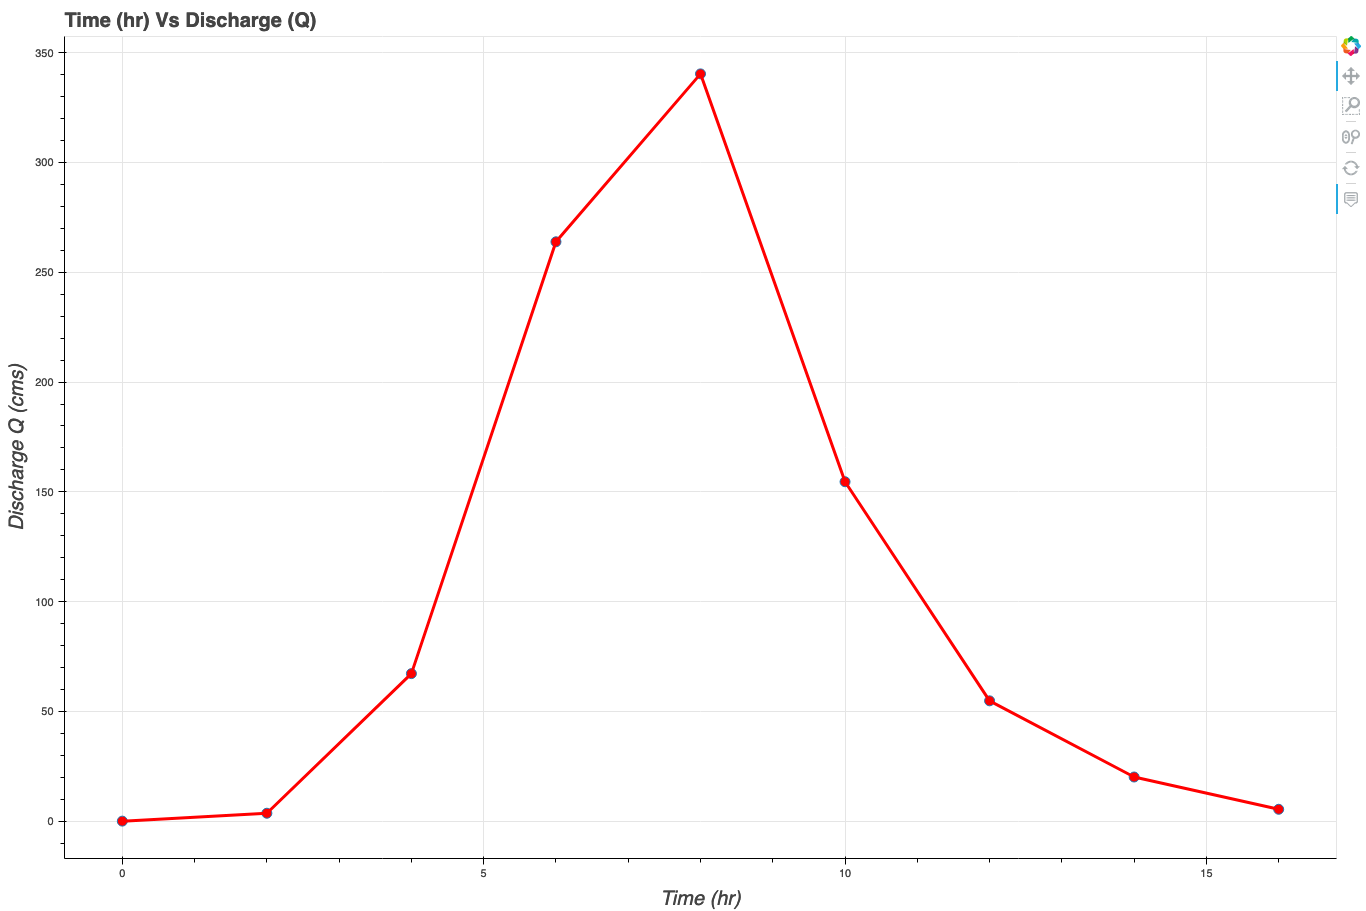

In [81]:
fig = initialize_fig(title = 'Time (hr) Vs Discharge (Q)',
                     x_axis_label = 'Time (hr)',
                     y_axis_label = 'Discharge Q (cms)',
                     tooltips = [
                         ('time(hr)', '$x'),
                         ('discharge(cms)'    , '$y'),
                     ],
                     plot_height = 300,
                    )

fig.title.text_font_size = '15pt'
fig.xaxis.axis_label_text_font_size = '15pt'
fig.yaxis.axis_label_text_font_size = '15pt'

fig.circle(df.hr, df.Qn, fill_color='red', size=10)
fig.line(df.hr, df.Qn, line_width=3, line_color='red')

bp.show(fig)

export_png(fig, filename=f'{BASE_DIR}/Test#2/problem_4.png', height=200, width=300)
Image(f'{BASE_DIR}/Test#2/problem_4.png')

In [82]:
# total excess rainfall duration
D = 2 + 2 # hr
# lag time is the time difference between the peak precip and peak discharge
# peak precip occurs at 2nd hour
# peak discharge occurs at 8th hour
tL = 8 - 2 # hr
tL

6

In [83]:
# time of concentration
tc = tL / 0.6
tc # hour

10.0

In [84]:
# time to rise
TR = D / 2 + tL
TR # hour

8.0

In [85]:
# duration of hydrograph
B = 1.67 * TR
B # hour

13.36

####  Time of concentration is the function of watershed characteristics. It will vary depending upon slope and character of the watershed and the flow path. Thus for the same watershed the time of concentration remains same given the variation in the rainfall event.